# EXPLORATORY DATA ANALYSIS

##### Will perform EDA on the dataset so as to have more information on the disease in question, and gain some business driven insights that might help hospitals or the medical field

In [11]:
# Import necessary data analysis and vizualization libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Permanent size for plots
sns.set(rc = {'figure.figsize':(12, 8)})

In [4]:
# Load the clean dataset
data = pd.read_csv('Datasets/clean_hypothyroid2.csv')
data.head()

,Unnamed: 0,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral source,output
0,0,41,F,f,f,f,f,f,f,f,...,f,f,f,1.30,2.5,125.0,1.14,109.0,SVHC,0
1,1,70,F,f,f,f,f,f,f,f,...,f,f,f,0.72,1.2,61.0,0.87,70.0,SVI,0
2,2,80,F,f,f,f,f,f,f,f,...,f,f,f,2.20,0.6,80.0,0.70,115.0,SVI,0
3,3,66,F,f,f,f,f,f,f,f,...,t,f,f,0.60,2.2,123.0,0.93,132.0,SVI,0
4,4,68,M,f,f,f,f,f,f,f,...,f,f,f,2.40,1.6,83.0,0.89,93.0,SVI,0


In [5]:
# Drop the redundant index column
data.drop(columns=('Unnamed: 0'), axis=1, inplace=True)

data.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral source,output
0,41,F,f,f,f,f,f,f,f,f,...,f,f,f,1.30,2.5,125.0,1.14,109.0,SVHC,0
1,70,F,f,f,f,f,f,f,f,f,...,f,f,f,0.72,1.2,61.0,0.87,70.0,SVI,0
2,80,F,f,f,f,f,f,f,f,f,...,f,f,f,2.20,0.6,80.0,0.70,115.0,SVI,0
3,66,F,f,f,f,f,f,f,f,f,...,t,f,f,0.60,2.2,123.0,0.93,132.0,SVI,0
4,68,M,f,f,f,f,f,f,f,f,...,f,f,f,2.40,1.6,83.0,0.89,93.0,SVI,0


## Univariate non-graphical Analysis

#### Average age of patients 

In [6]:
# Average age
data['age'].mean()

52.752273554019645

the mean age of hypothyroid patients is 52 years

### Statistical summary of ages of patients

In [7]:
data['age'].describe()

count    2749.000000
mean       52.752274
std        18.852394
min         1.000000
25%        37.000000
50%        55.000000
75%        68.000000
max        94.000000
Name: age, dtype: float64

## Univariate Graphical analysis

### Distribution of patients' age

Text(0, 0.5, 'number of patients')

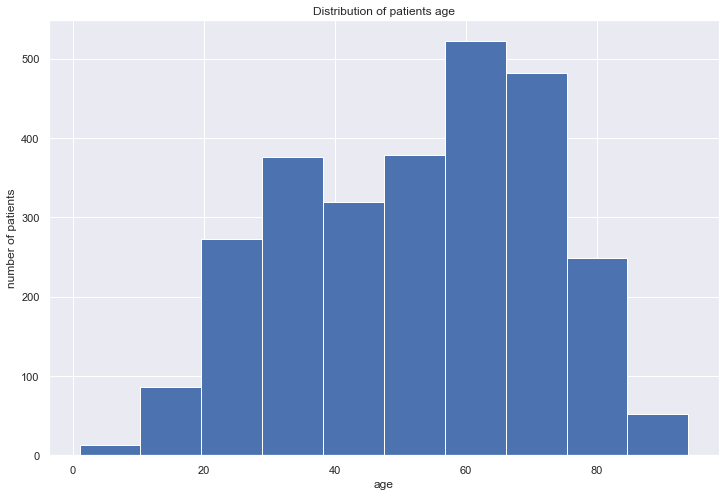

In [14]:
# Distribution of patient's age

data['age'].hist()
plt.title('Distribution of patients age')
plt.xlabel('age')
plt.ylabel('number of patients')

The distribution of patients' age is slightly skewed to the right. This indicates that the disease under study often affects the older generation (people over 50 years old)

### Gender of patients

<AxesSubplot:xlabel='sex', ylabel='count'>

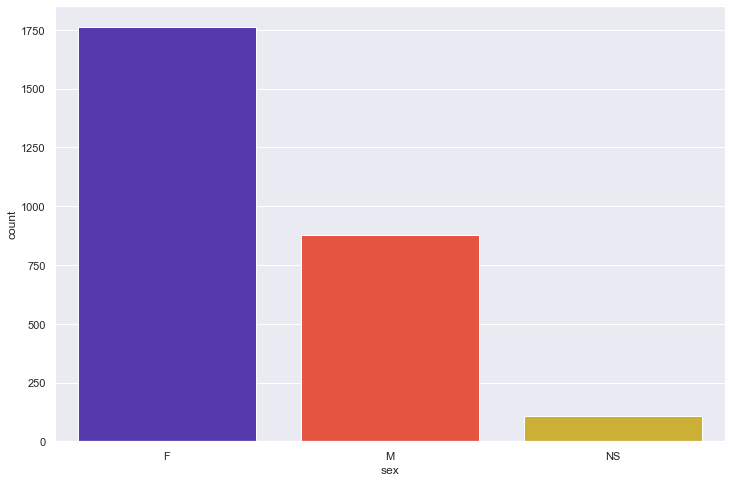

In [23]:
sns.countplot(data = data, x = 'sex', palette = 'CMRmap')

As seen, there are more female patients than male, almost double. A few number of patients did not specify their gender.

### Patients on thyroxine medication

<AxesSubplot:xlabel='on thyroxine', ylabel='count'>

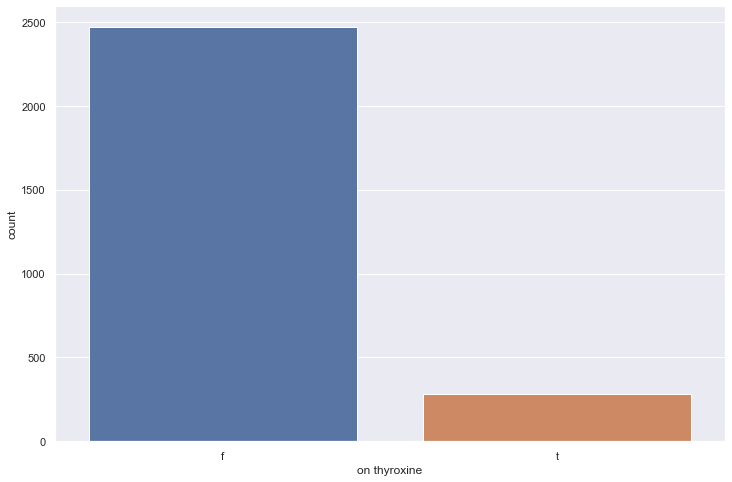

In [26]:
sns.countplot(data = data, x = 'on thyroxine')

Most of the patients are not on thyroxine medication.

### Sickly patients

<AxesSubplot:xlabel='sick', ylabel='count'>

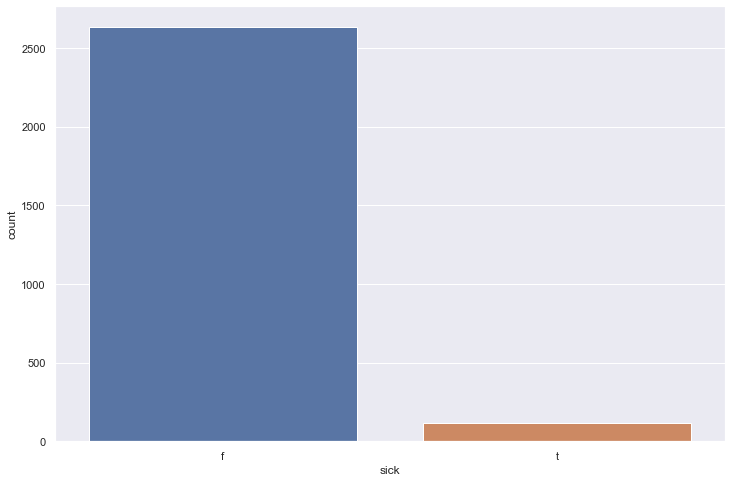

In [27]:
sns.countplot(data = data, x = 'sick')

Most of the patients are of healthy stature. This shows that patients suffering from the ailment can appear as they are normal.

### Pregnant patients

<AxesSubplot:xlabel='pregnant', ylabel='count'>

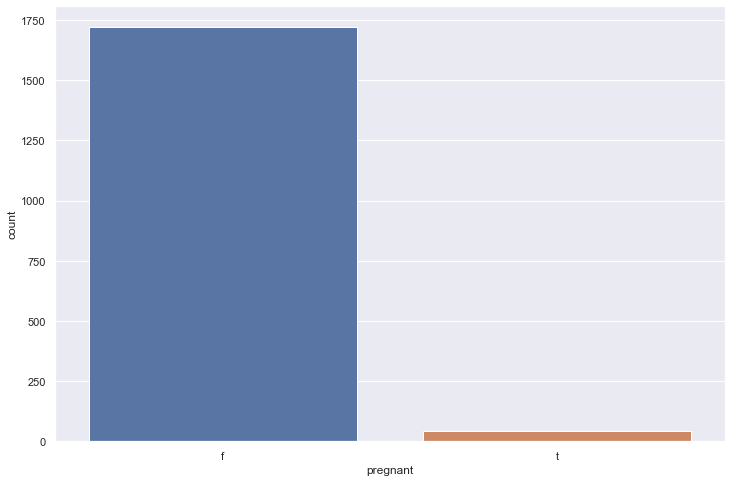

In [29]:
# Hav eto condition to when sex = F

data_female = data[data['sex'] == 'F']

# Plot
sns.countplot(data = data_female, x = 'pregnant')

AN overwhelmong percentage of female patients were not pregnant

### Source of referal

<AxesSubplot:xlabel='referral source', ylabel='count'>

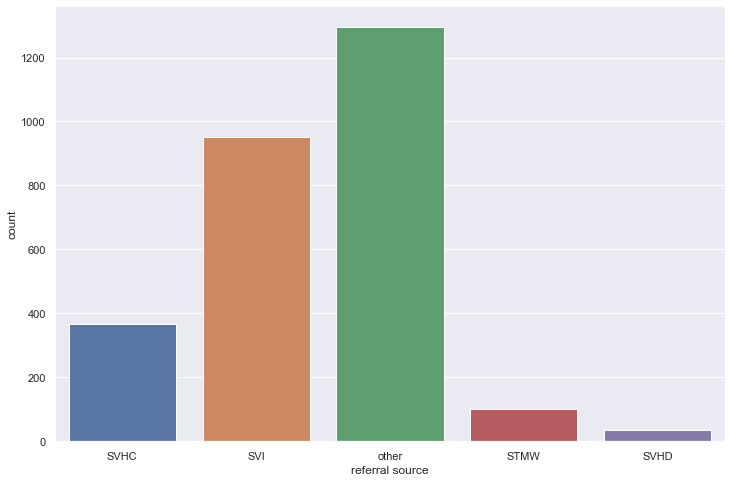

In [30]:
sns.countplot(data = data, x = 'referral source')

Most of the patients were refered by an unknown source, followed by SVI and SVHC

As the data was mainly categorical, there will be no bivariate analysis such as scatterplots.

We will proceed onto preprocessing for modelling